In [1]:
# keywords

# load_wine, DecisionTreeClassifier, graphviz, GridSearchCV, cross_val_score, GridSearchCV.best_params_

# Урок 3. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
### YOUR CODE HERE ###

wine_dataset = load_wine()
X = wine_dataset.data
x_train, x_test, y_train, y_test = train_test_split(X, wine_dataset['target'], random_state=17)
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)


### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [4]:
from sklearn import tree
import graphviz

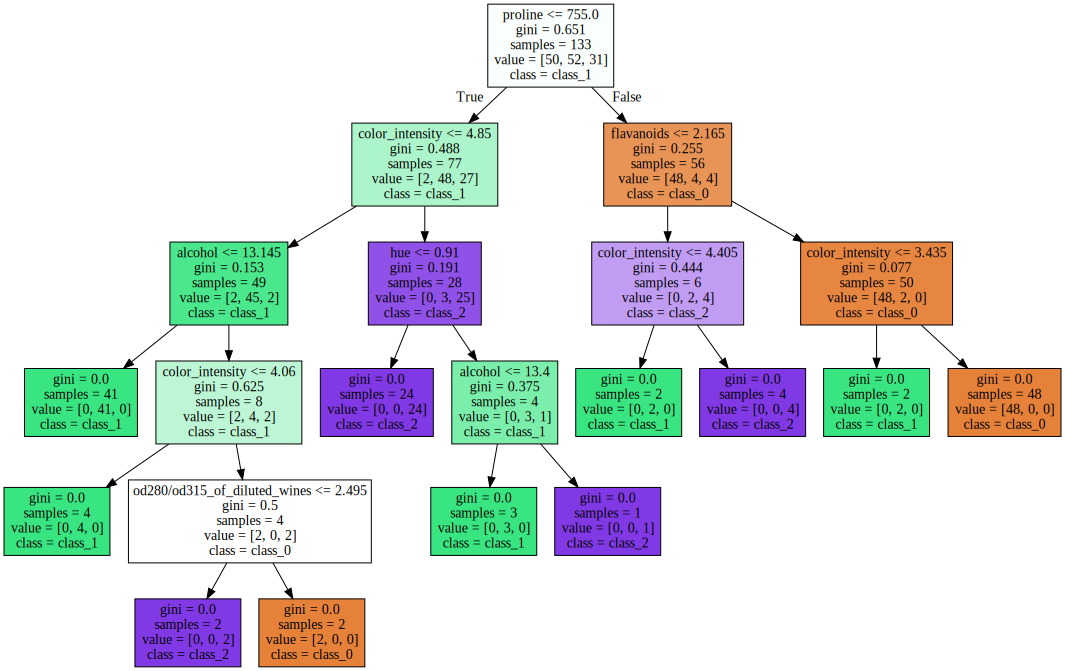

In [5]:
dot_data = tree.export_graphviz(dtc_model, out_file=None,
                                    feature_names=wine_dataset.feature_names,  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
graphviz.Source(dot_data)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [6]:
### YOUR CODE HERE ###

dtc_model.predict(x_test)
dtc_model.score(x_test, y_test)

0.9111111111111111

Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [7]:
### YOUR CODE HERE ###

dtc = DecisionTreeClassifier(max_features=2)
dtc_model1 = dtc.fit(x_train, y_train)
dtc_model1.predict(x_test)
dtc_model1.score(x_test, y_test)

0.9555555555555556

### 5.
Теперь постройте граф дерева решений, используя graphviz.

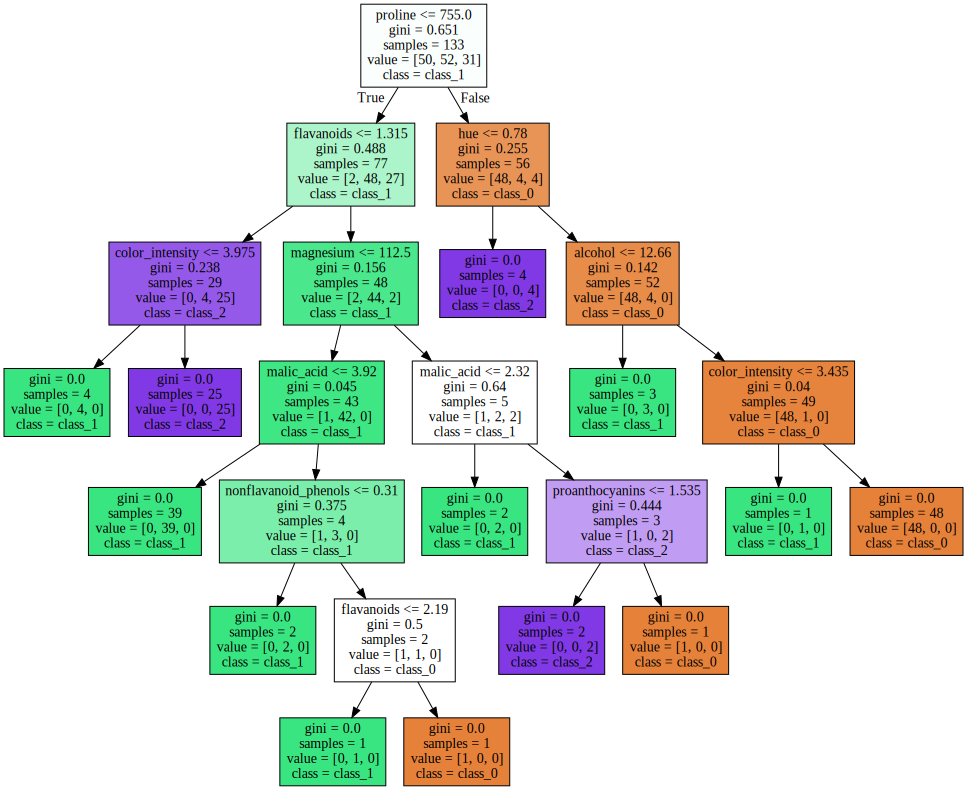

In [8]:
### YOUR CODE HERE ###

dot_data = tree.export_graphviz(dtc_model1, out_file=None,
                                    feature_names=wine_dataset.feature_names,  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
graphviz.Source(dot_data)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [10]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(estimator=dtc_model1, param_grid=tree_params,cv=5)

#### YOUR CODE HERE ###

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [11]:
### YOUR CODE HERE ###
tree_grid.fit(x_test, y_test)
tree_grid.best_params_

{'max_depth': 2, 'max_features': 6}

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [12]:
from sklearn.metrics import accuracy_score
dtc_model2 = DecisionTreeClassifier(max_depth=2, max_features=5)

In [13]:

predicted = dtc_model1.predict(x_test) ### YOUR CODE HERE ###
accuracy = dtc_model1.score(x_test, y_test) ### YOUR CODE HERE ###

In [14]:
print('accuracy = {}'.format(accuracy))

accuracy = 0.9555555555555556
